1. Given the [dataset](Datasets/Q1_dataset.csv) which contains the close price for a given stock, can you plot confidence intervals for the data set? The output should be a plot with the stock price and confidence intervals shown on the same plot.

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
stock_price = pd.read_csv('Q1_dataset.csv')

In [3]:
#make sure data is fully filled
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
Date     210 non-null object
Close    210 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [4]:
stock_price.head()

,Date,Close
0,1/2/2018,1065.00
1,1/3/2018,1082.48
2,1/4/2018,1086.40
3,1/5/2018,1102.23
4,1/8/2018,1106.94


Text(0, 0.5, 'Price')

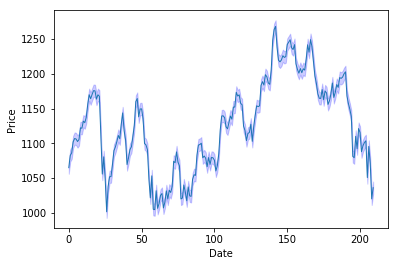

In [5]:
#calculate the standard error using all data points with 95% confidence interval
z_critical = stats.norm.ppf(q = 0.975)
standard_error = z_critical * stock_price['Close'].sem()
#calculate the upper and lower bound
lower_bound = stock_price['Close']-standard_error
upper_bound = stock_price['Close']+standard_error

#Plotting.
plt.plot(stock_price['Close'], linewidth=1) #mean curve.
plt.fill_between(stock_price['Close'].index, lower_bound, upper_bound, color='b', alpha=.2)
plt.xlabel('Date')
plt.ylabel('Price')